In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'sms']

In [6]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.tail()

,label,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [10]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
y_data = df['label'].values

In [16]:
y_data = le.fit_transform(y_data)

In [18]:
print(y_data)

[0 0 1 ... 0 0 0]


In [20]:
print(df['sms'])

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: sms, Length: 5572, dtype: object


In [22]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [27]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [24]:
sw= set(stopwords.words('english'))
ps= PorterStemmer()

In [26]:
def cleantext(sample):
    sample= sample.lower()
    sample= sample.replace("<br/ ><br/ >"," ")
    sample=re.sub("[^a-zA-Z]+"," ",sample)
    
    sample=sample.split(" ")
    sample=[ps.stem(s) for s in sample if s not in sw] 
    
    sample=" ".join(sample)
    
    return sample

In [28]:
cleantext(df['sms'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat '

In [30]:
df['cleanedmessage']=df['sms'].apply(cleantext)

In [38]:
corpus=df['cleanedmessage'].values

In [40]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [42]:
cv=CountVectorizer(max_df=0.5,max_features=50000)

In [44]:
x_data=cv.fit_transform(corpus)

In [46]:
x_data.shape

(5572, 6221)

In [48]:
print(x_data[0])

  (0, 2148)	1
  (0, 2794)	1
  (0, 4046)	1
  (0, 1162)	1
  (0, 377)	1
  (0, 732)	1
  (0, 2222)	1
  (0, 6060)	1
  (0, 2898)	1
  (0, 730)	1
  (0, 957)	1
  (0, 2185)	1
  (0, 188)	1
  (0, 5886)	1


In [50]:
tfidf=TfidfTransformer()

In [52]:
x_data=tfidf.fit_transform(x_data)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=42)

In [56]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #normalize = true
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [58]:
def perf_measure(y_actual, y_hat):
    y_actual=np.array(y_actual)
    y_hat=np.array(y_hat)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i] and y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [62]:
clf_lr= LogisticRegression(solver='liblinear', penalty='l1')
clf_lr.fit(X_train, y_train)
pred_lr=clf_lr.predict(X_test)

In [64]:
clf_lr.score(X_test,y_test)

0.9533492822966507

In [66]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1453
           1       0.94      0.68      0.79       219

    accuracy                           0.95      1672
   macro avg       0.95      0.84      0.88      1672
weighted avg       0.95      0.95      0.95      1672



Confusion matrix, without normalization
[[1444    9]
 [  69  150]]


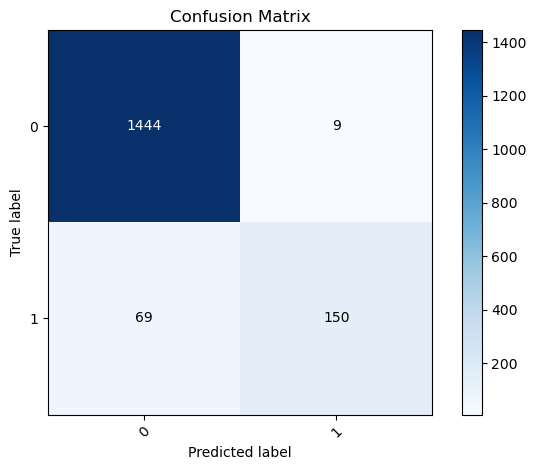

In [70]:
cnf_matrix_lr=confusion_matrix(y_test,pred_lr)
plot_confusion_matrix(cnf_matrix_lr,[0,1],normalize=False,title="Confusion Matrix")

In [72]:
clf_mnb=MultinomialNB(alpha = 0.3) 

clf_mnb.fit(X_train,y_train)
pred_mnb=clf_mnb.predict(X_test)
acc_mnb=clf_mnb.score(X_test,y_test)

print("Accuracy : ",acc_mnb)

Accuracy :  0.9760765550239234


In [74]:
print(classification_report(y_test,pred_mnb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1453
           1       0.95      0.86      0.90       219

    accuracy                           0.98      1672
   macro avg       0.97      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



Confusion matrix, without normalization
[[1444    9]
 [  31  188]]


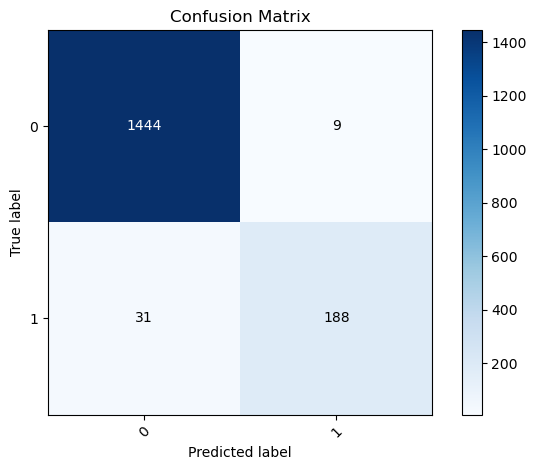

In [76]:
cnf_matrix_mnb=confusion_matrix(y_test,pred_mnb)
plot_confusion_matrix(cnf_matrix_mnb,[0,1],normalize=False,title="Confusion Matrix")

In [78]:
clf_dtc=DecisionTreeClassifier(random_state=0)

clf_dtc.fit(X_train,y_train)
pred_dtc=clf_dtc.predict(X_test)
acc_dtc=clf_dtc.score(X_test,y_test)

print("Accuracy : ",acc_dtc)

Accuracy :  0.9581339712918661


In [80]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1453
           1       0.84      0.84      0.84       219

    accuracy                           0.96      1672
   macro avg       0.91      0.91      0.91      1672
weighted avg       0.96      0.96      0.96      1672



Confusion matrix, without normalization
[[1418   35]
 [  35  184]]


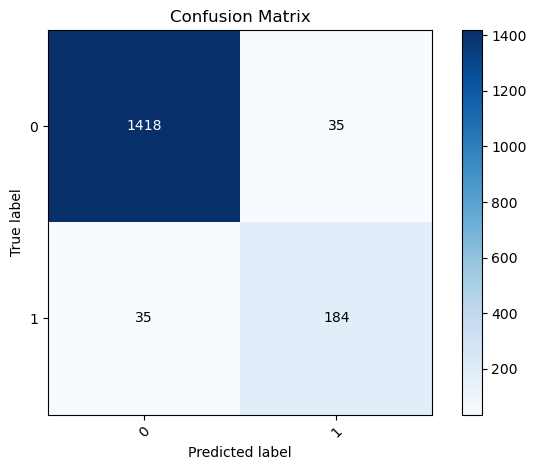

In [82]:
cnf_matrix_dtc=confusion_matrix(y_test,pred_dtc)
plot_confusion_matrix(cnf_matrix_dtc,[0,1],normalize=False,title="Confusion Matrix")

In [84]:
clf_svm = svm.SVC(kernel='sigmoid', gamma=2.0, probability=True)

clf_svm.fit(X_train,y_train)
pred_svm=clf_svm.predict(X_test)
acc_svm=clf_svm.score(X_test,y_test)

print("Accuracy : ",acc_svm)

Accuracy :  0.9712918660287081


In [86]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1453
           1       0.94      0.83      0.88       219

    accuracy                           0.97      1672
   macro avg       0.96      0.91      0.93      1672
weighted avg       0.97      0.97      0.97      1672



Confusion matrix, without normalization
[[1442   11]
 [  37  182]]


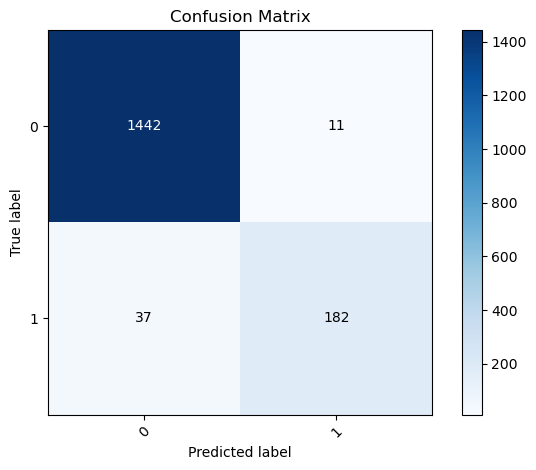

In [88]:
cnf_matrix_svm=confusion_matrix(y_test,pred_svm)
plot_confusion_matrix(cnf_matrix_svm,[0,1],normalize=False,title="Confusion Matrix")

In [90]:
classifiers=[]

classifiers.append(('LogisticRegression',clf_lr))
classifiers.append(('MNB',clf_mnb))
classifiers.append(('SVM',clf_svm))
classifiers.append(('Desicion Tree',clf_dtc))

In [92]:
result=[]
cnf_matric_parameter=[]
for i,v in classifiers:
        
    
    pred=v.predict(X_test)
    acc=accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    f_measure=f1_score(y_test,pred)
    result.append((i,acc,precision,recall,f_measure))
    
    TP,FP,TN,FN=perf_measure(y_test,pred)
    cnf_matric_parameter.append((i,TP,FP,TN,FN))

In [94]:
column_names=['Algorithm','Accuracy','Precision','Recall','F-measure']
df1=pd.DataFrame(result,columns=column_names)
print(df1)

            Algorithm  Accuracy  Precision    Recall  F-measure
0  LogisticRegression  0.953349   0.943396  0.684932   0.793651
1                 MNB  0.976077   0.954315  0.858447   0.903846
2                 SVM  0.971292   0.943005  0.831050   0.883495
3       Desicion Tree  0.958134   0.840183  0.840183   0.840183


In [96]:
column_names=['Algorithm','True_Pos','False_Pos','True_Neg','False_Neg']
df2=pd.DataFrame(cnf_matric_parameter,columns=column_names)
print(df2)

            Algorithm  True_Pos  False_Pos  True_Neg  False_Neg
0  LogisticRegression       150          9      1444         69
1                 MNB       188          9      1444         31
2                 SVM       182         11      1442         37
3       Desicion Tree       184         35      1418         35


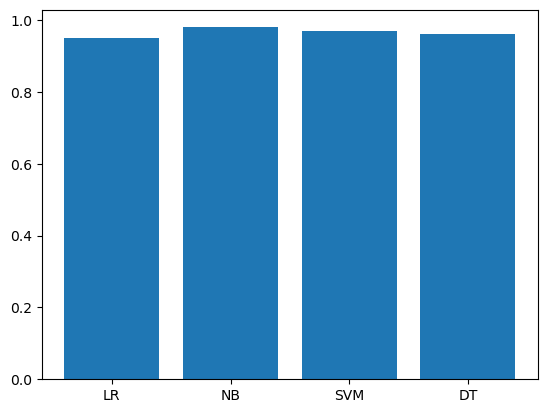

In [98]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["LR", "NB", "SVM", "DT"])
y = np.array([0.95, 0.98, 0.97, 0.96])

plt.bar(x,y)
plt.show()